@article{Pilgrim2021, 
         doi = {10.21105/joss.03859}, 
         url = {https://doi.org/10.21105/joss.03859}, 
         year = {2021}, publisher = {The Open Journal}, 
         volume = {6}, 
         number = {68}, 
         pages = {3859}, 
         author = {Charlie Pilgrim}, 
         title = {piecewise-regression (aka segmented regression) in Python}, 
         journal = {Journal of Open Source Software} 
        }

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import piecewise_regression

from reg import quicklook, break_regression


path = f"data{os.sep}"
filename = "phys_data_2023-03-12_side0.csv"

In [2]:
df = pd.read_csv(f"{path}{filename}", parse_dates=True, index_col="TimeUTC")

In [3]:
df

,P1,P2,P3,P4,P5,P6,P7,P8,P9,E1,E2,E3,E4,E5,E6,E7,DT,PA
TimeUTC,,,,,,,,,,,,,,,,,,
2023-03-12 00:00:00,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,11.40,0.0,0.0,0.000,0.000,0.00,86.490453
2023-03-12 00:00:24,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0144,167.0,0.0,7.58,0.0,0.0,0.000,0.000,0.00,81.321720
2023-03-12 00:00:48,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,0.0,0.0,0.00,0.0,0.0,0.627,0.000,0.00,69.690026
2023-03-12 00:01:12,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,112.0,17.6,0.00,0.0,0.0,0.313,0.000,0.00,70.727876
2023-03-12 00:01:36,0.0,0.00,0.00,0.00,0.000,0.000,0.000,0.0000,0.0000,55.8,0.0,0.00,0.0,0.0,0.000,0.000,0.00,68.520445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-14 23:58:00,61.2,7.14,3.95,3.42,1.590,0.000,0.142,0.0671,0.0144,7090.0,2200.0,865.00,325.0,10.5,0.314,0.000,1.29,100.899747
2023-03-14 23:58:24,24.5,14.30,9.88,5.70,1.590,0.954,0.142,0.0671,0.0000,5030.0,1920.0,819.00,309.0,21.0,0.000,0.088,1.12,84.530333
2023-03-14 23:58:48,61.2,21.40,9.89,2.28,1.590,0.000,0.142,0.0671,0.0000,6480.0,2360.0,895.00,262.0,16.8,0.314,0.000,1.46,95.456014


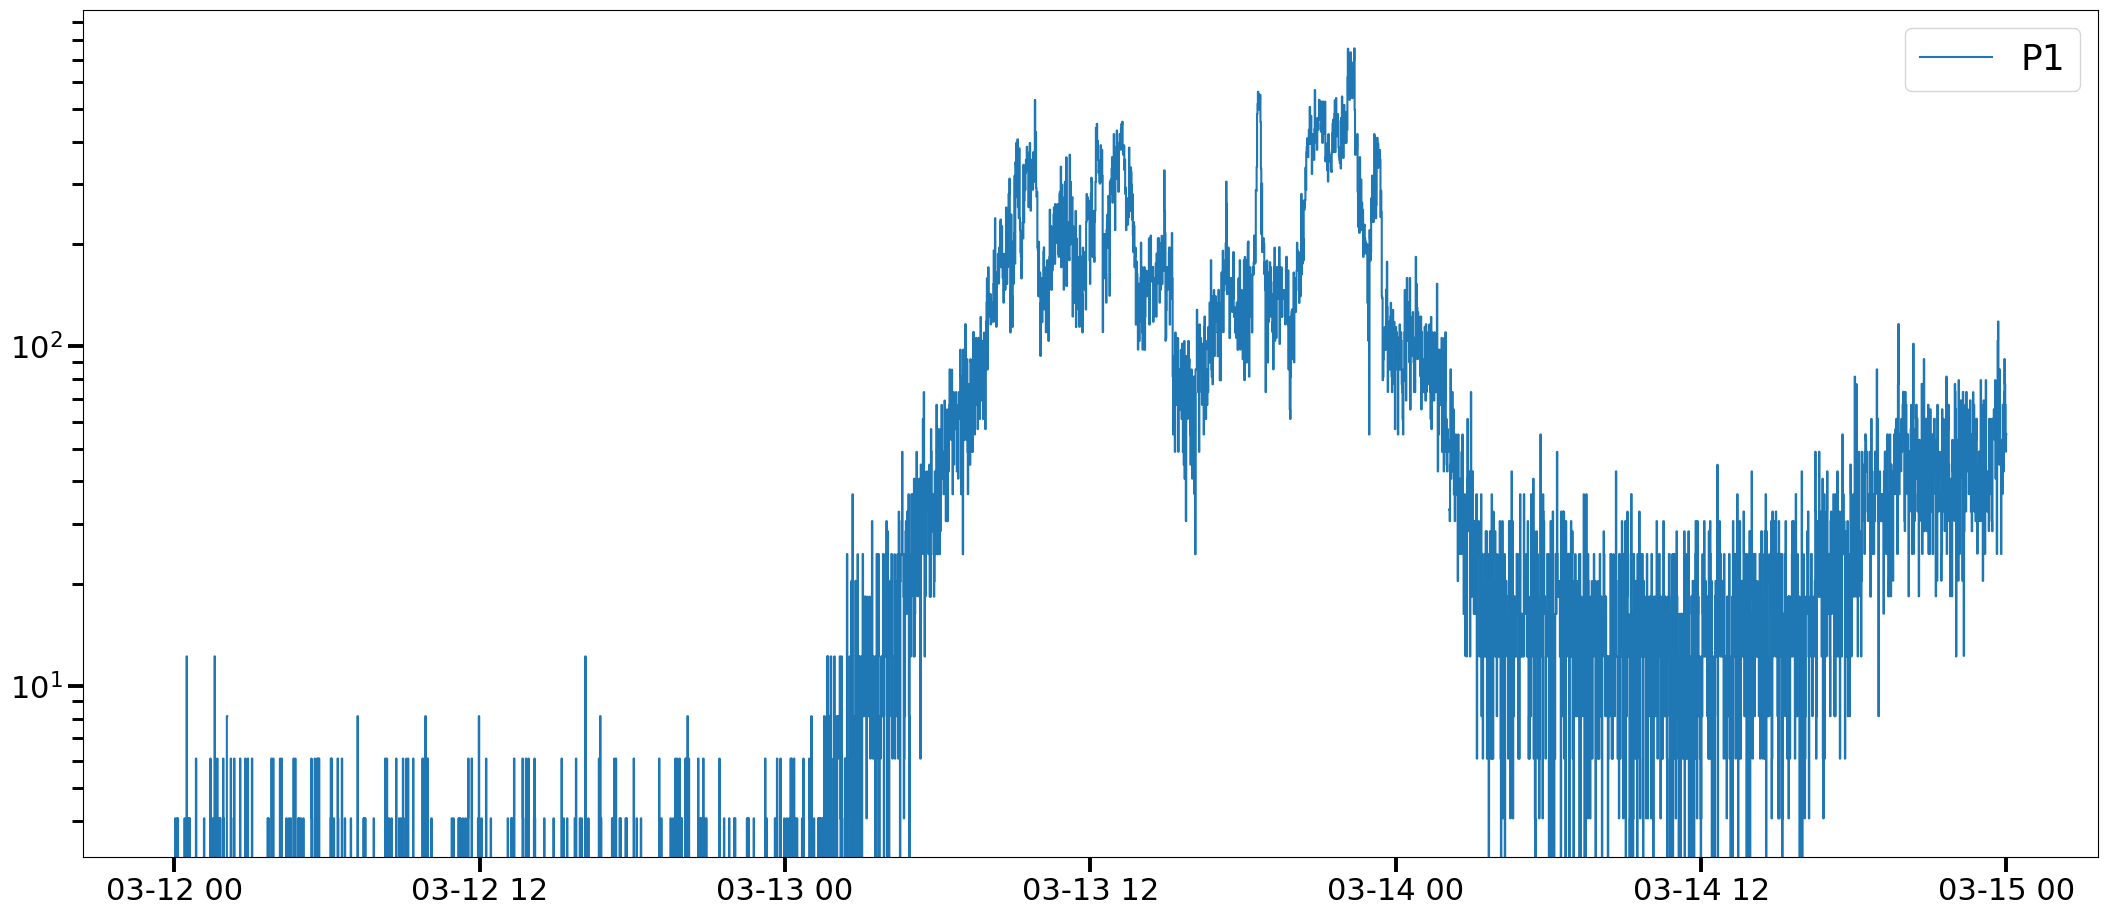

In [44]:
quicklook(data=df, channel="P1", resample="1 min")

### piecewise-regression testing:

In [6]:
# The slope of the first line
alpha_1 = 0.5

# The slope of the second line
alpha_2 = 7

# The constant factor of the first line alpha_1 * x + C
constant = 12

# The point at which the gradient changes from alpha_1 to alpha_2
breakpoint_1 = 11

# The number of data points in consideration
n_points = 2000

# Setting the random seed for reproductibility
np.random.seed(0)

# The x-axis values, i.e., the independent variable
xx = np.linspace(0, 20, n_points)

# The dependent variable
yy = constant + alpha_1*xx + (alpha_2-alpha_1) * np.maximum(xx - breakpoint_1, 0) + np.random.normal(size=n_points)


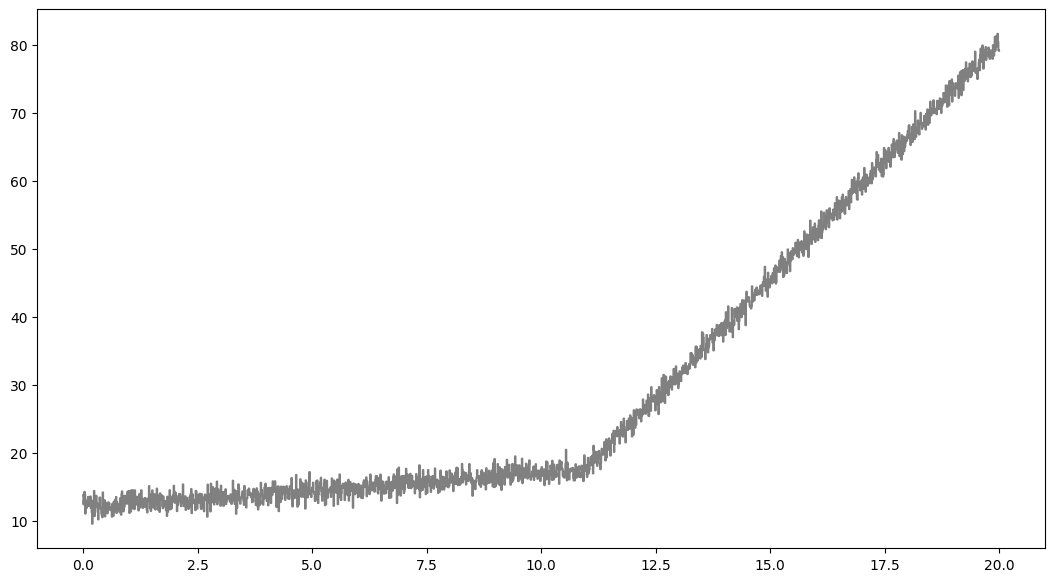

In [34]:
# Prepare the figure visualizing the data
fig, ax = plt.subplots(figsize=(13,7))

ax.step(xx,yy, where="mid", c="grey")
#ax.scatter(xx,yy)

plt.show()

In [18]:
# Given some data, fit the model
pw_fit = piecewise_regression.Fit(xx, yy, start_values=[5], n_breakpoints=1)

# Print a summary of the fit
pw_fit.summary()


                    Breakpoint Regression Results                     
No. Observations                     2000
No. Model Parameters                    4
Degrees of Freedom                   1996
Res. Sum of Squares               1910.35
Total Sum of Squares          8.84751e+05
R Squared                        0.997841
Adjusted R Squared               0.997836
Converged:                           True
                    Estimate      Std Err            t        P>|t|       [0.025       0.975]
----------------------------------------------------------------------------------------------------
const                11.9589        0.059       202.67           0.0       11.843       12.075
alpha1              0.499759      0.00931        53.68           0.0       0.4815      0.51802
beta1                6.48542       0.0156       416.02             -       6.4548        6.516
breakpoint1          10.9804       0.0136            -             -       10.954       11.007
-----------------

'\n                    Breakpoint Regression Results                     \n====================================================================================================\nNo. Observations                     2000\nNo. Model Parameters                    4\nDegrees of Freedom                   1996\nRes. Sum of Squares               1910.35\nTotal Sum of Squares          8.84751e+05\nR Squared                        0.997841\nAdjusted R Squared               0.997836\nConverged:                           True\n====================================================================================================\n====================================================================================================\n                    Estimate      Std Err            t        P>|t|       [0.025       0.975]\n----------------------------------------------------------------------------------------------------\nconst                11.9589        0.059       202.67           0.0       11.

In [19]:
# Get the key results of the fit
pw_results = pw_fit.get_results()
pw_estimates = pw_results["estimates"]

In [20]:
pw_results

{'davies': 0.0,
 'estimates': {'const': {'estimate': 11.95892145068034,
   'se': 0.059007610826463185,
   'confidence_interval': (11.84319848553212, 12.074644415828558),
   't_stat': 202.66744040613,
   'p_t': 0.0},
  'beta1': {'estimate': 6.485421536556528,
   'se': 0.01558903155915342,
   'confidence_interval': (6.454849057336519, 6.515994015776537),
   't_stat': 416.0246588729548,
   'p_t': '-'},
  'breakpoint1': {'estimate': 10.980420870967645,
   'se': 0.013557487007679007,
   'confidence_interval': (10.953832561857807, 11.007009180077484),
   't_stat': '-',
   'p_t': '-'},
  'alpha1': {'estimate': 0.4997592260207653,
   'se': 0.00930991848222239,
   'confidence_interval': (0.4815010495421506, 0.5180174024993799),
   't_stat': 53.68030095806668,
   'p_t': 0.0},
  'alpha2': {'estimate': 6.9851807625772935,
   'se': 0.012503732355047243,
   'confidence_interval': (6.960659027782756, 7.009702497371831),
   't_stat': 558.6476552945139,
   'p_t': 0.0}},
 'bic': -61.32164004391645,
 'rs

In [21]:
pw_estimates

{'const': {'estimate': 11.95892145068034,
  'se': 0.059007610826463185,
  'confidence_interval': (11.84319848553212, 12.074644415828558),
  't_stat': 202.66744040613,
  'p_t': 0.0},
 'beta1': {'estimate': 6.485421536556528,
  'se': 0.01558903155915342,
  'confidence_interval': (6.454849057336519, 6.515994015776537),
  't_stat': 416.0246588729548,
  'p_t': '-'},
 'breakpoint1': {'estimate': 10.980420870967645,
  'se': 0.013557487007679007,
  'confidence_interval': (10.953832561857807, 11.007009180077484),
  't_stat': '-',
  'p_t': '-'},
 'alpha1': {'estimate': 0.4997592260207653,
  'se': 0.00930991848222239,
  'confidence_interval': (0.4815010495421506, 0.5180174024993799),
  't_stat': 53.68030095806668,
  'p_t': 0.0},
 'alpha2': {'estimate': 6.9851807625772935,
  'se': 0.012503732355047243,
  'confidence_interval': (6.960659027782756, 7.009702497371831),
  't_stat': 558.6476552945139,
  'p_t': 0.0}}

In [22]:
# Extract the results of fitting
estimated_const = pw_estimates["const"]["estimate"]
estimated_alpha_1 = pw_estimates["alpha1"]["estimate"]
estimated_alpha_2 = pw_estimates["alpha2"]["estimate"]

estimated_breakpoint = pw_estimates["breakpoint1"]["estimate"]
breakpoint_errs = pw_estimates["breakpoint1"]["confidence_interval"]

In [23]:
# Construct lines to show on the plot
line1 = xx*estimated_alpha_1 + estimated_const
line2 = xx*estimated_alpha_2 + np.nanmax(line1) - np.nanmax(yy)

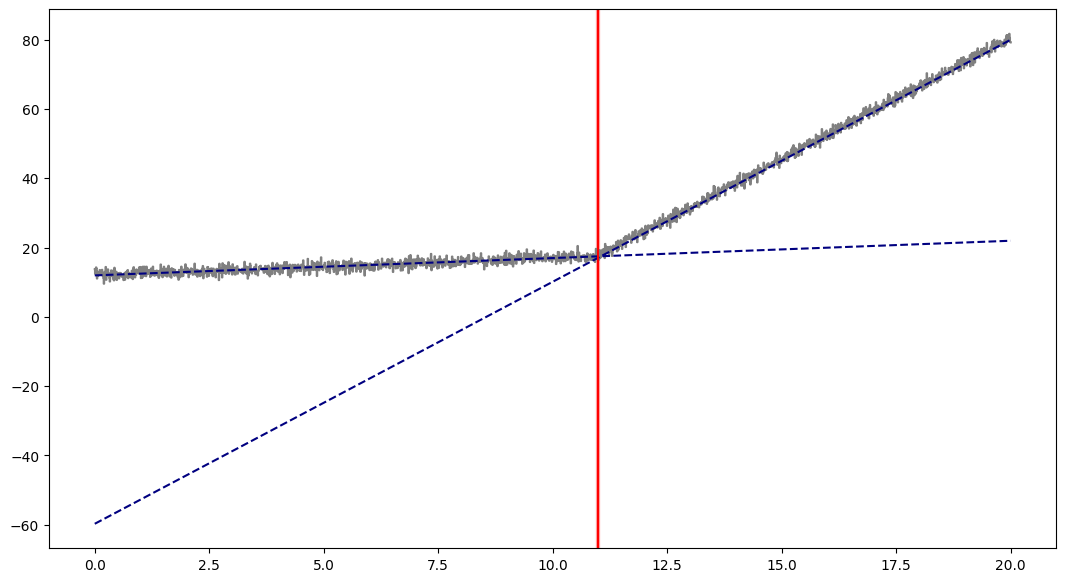

In [35]:
# Plot the estimated values
ax.plot(xx, line1, ls="--", c="navy")
ax.plot(xx, line2, ls="--", c="navy")

ax.axvspan(xmin=breakpoint_errs[0], xmax=breakpoint_errs[1], alpha=0.25, color="red")
ax.axvline(x=estimated_breakpoint, c="red")

fig

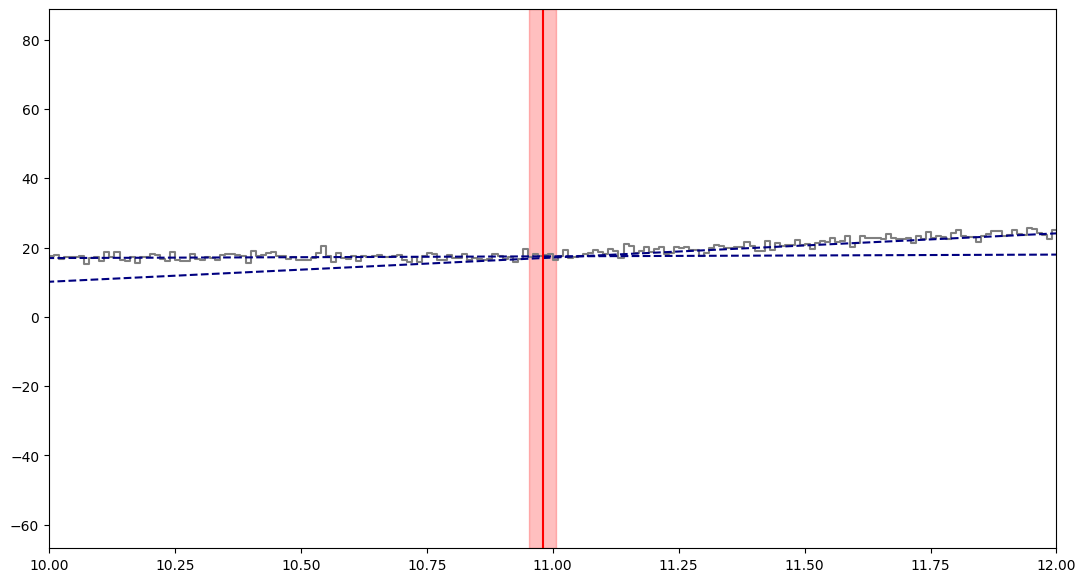

In [36]:
ax.set_xlim(10,12)
fig

In [38]:
# Try the same but now with the P1 channel of previously downloaded data

In [90]:
kek = 0
for i in range(25):
    
    kek += 1
    
print(kek)

25


In [114]:
def search_first_peak(ints, window=None):
    """
    Searches for a local maximum for a given window.
    """
    
    if window is None:
        window = 30

    max_val = -1e5
    warnings = 0
    for idx, val in enumerate(ints):

        # If value is nan -> the original val was 0 -> skip
        if np.isnan(val):
            warnings = 0
            continue

        if val >= max_val:
            max_val = val
            warnings = 0
        else:
            warnings += 1
            
        #print(f"warnings: {warnings}")
        
        if warnings == window:
            max_idx = idx-window
            return max_val, max_idx
    
    return False, False

In [115]:
# Intensities of P1 channel
ints = np.log10(df["P1"].values)
times = df.index.values
indices = np.linspace(start=0, stop=len(times)-1, num=len(times))

<ipython-input-115-619989919557>:2: RuntimeWarning: divide by zero encountered in log10
  ints = np.log10(df["P1"].values)


In [116]:
ints = np.where(ints==-np.inf, np.nan, ints)
ints

array([       nan,        nan,        nan, ..., 1.78675142, 1.68930886,
       1.78675142])

In [121]:
first_peak, first_peak_idx = search_first_peak(ints=ints, window=120)
print(first_peak)
print(first_peak_idx)

2.8356905714924254
5073


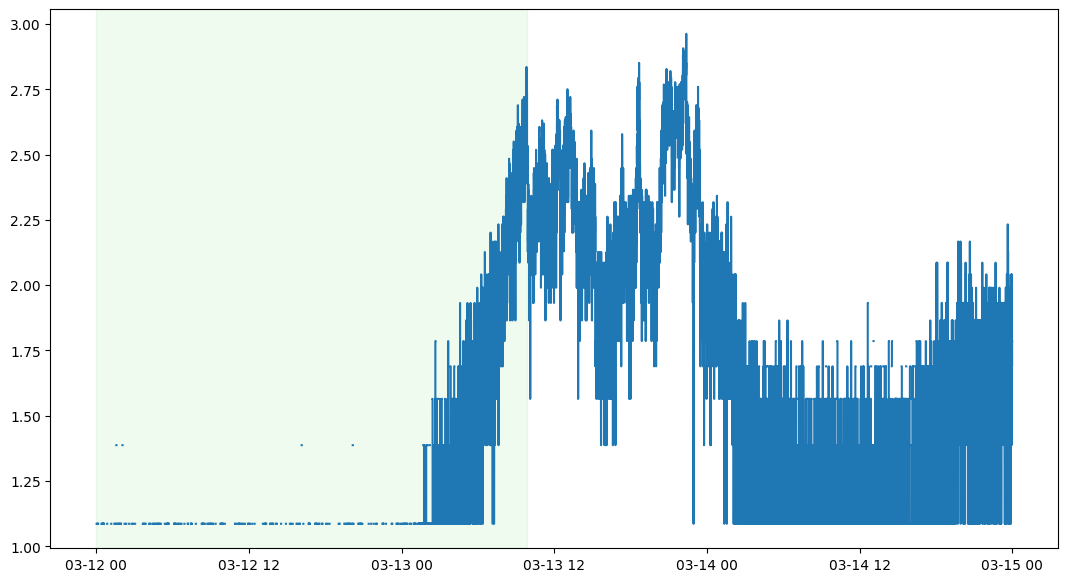

In [122]:
fig1, ax1 = plt.subplots(figsize=(13,7))

ax1.step(times, ints)

ax1.axvspan(xmin=times[0], xmax=times[first_peak_idx], alpha=0.08, color="limegreen")

plt.show()

In [123]:
# Apply selection until the first peak
indices_sel = indices[:first_peak_idx]
ints_sel = ints[:first_peak_idx]

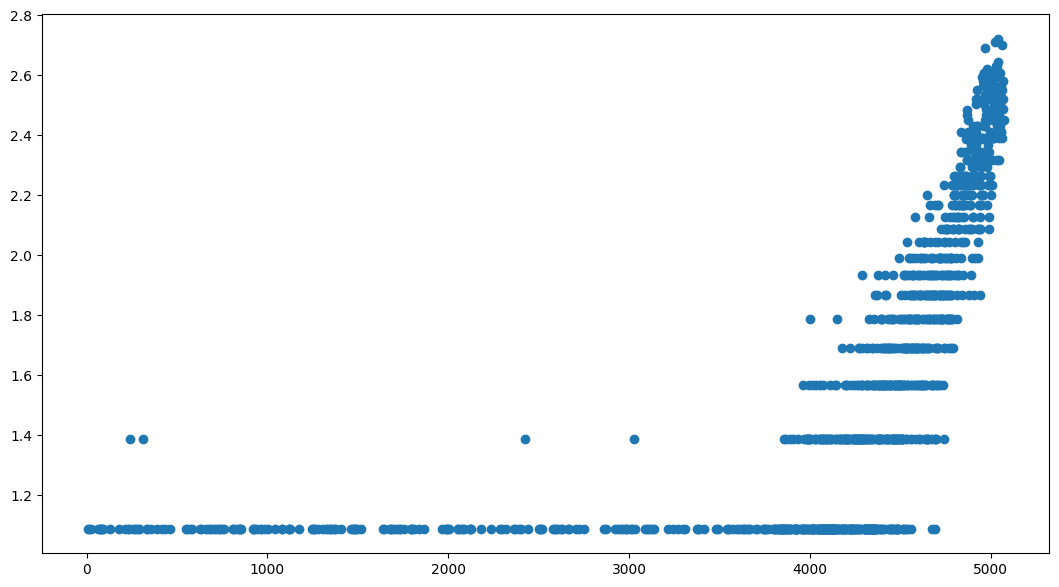

In [129]:
fig2, ax2 = plt.subplots(figsize=(13,7))

ax2.step(indices_sel, ints_sel)
ax2.scatter(indices_sel, ints_sel)

plt.show()

In [127]:
# Fit the model
p1_fit = piecewise_regression.Fit(indices_sel, ints_sel, start_values=[5], n_breakpoints=1)

# Print a summary of the fit
p1_fit.summary()

Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None
Summary of why the algorithm did not converge:
Run 1: Error encountered: exog contains inf or nans 
Run 2: Error encountered: exog contains inf or nans 
Run 3: Error encountered: exog contains inf or nans 
Run 4: Error encountered: exog contains inf or nans 
Run 5: Error encountered: exog contains inf or nans 
Run 6: Error encountered: exog contains inf or nans 
Run 7: Error encountered: exog contains inf or nans 
Run 8: Error encountered: exog contains inf or nans 
Run 9: Error encountered: exog contains inf or nans 
Run 10: Error encountered: exog contains inf or nans 
Run 11: Error encountered: exog contains inf or nans 
Run 12: Error encountered: exog contains inf or nans 
Run 13: Error encountered: exog contains inf or nans 
Run 14: Error encountered: exog contains inf or nans 
Run 15: Error encountered: exog contains inf or nans 
Run 16: Error encountered: exog contains inf or na

'Algorithm did not converge. Try different n_breakpoints, different start_values, or start_values=None\nSummary of why the algorithm did not converge:\nRun 1: Error encountered: exog contains inf or nans \nRun 2: Error encountered: exog contains inf or nans \nRun 3: Error encountered: exog contains inf or nans \nRun 4: Error encountered: exog contains inf or nans \nRun 5: Error encountered: exog contains inf or nans \nRun 6: Error encountered: exog contains inf or nans \nRun 7: Error encountered: exog contains inf or nans \nRun 8: Error encountered: exog contains inf or nans \nRun 9: Error encountered: exog contains inf or nans \nRun 10: Error encountered: exog contains inf or nans \nRun 11: Error encountered: exog contains inf or nans \nRun 12: Error encountered: exog contains inf or nans \nRun 13: Error encountered: exog contains inf or nans \nRun 14: Error encountered: exog contains inf or nans \nRun 15: Error encountered: exog contains inf or nans \nRun 16: Error encountered: exog 